# Telco Customer Churn - Focused Customer retention 

## 1.0 Introduction (Section 1)

The Telco churn dataset provides customer information regarding a fictitious telecommunications company operating in California. This dataset encompasses records for 7,043 customers, delineating customers who have discontinued, retained, or newly subscribed to their services. The data was originally released by IBM, and the version used for this exercise can be accessed here - https://www.kaggle.com/datasets/blastchar/telco-customer-churn. 

### 1.1 Understanding & Cleansing the Data

In [1]:
import pandas as pd  # imported to load and manipulate the dataset
import numpy as np # imported for additional maths and/or stats functions
import matplotlib.pyplot as plt # imported for data visualisation functions
import seaborn as sns #imported for additional data visualisation functions
import warnings # imported s to control warning messages issued by other Python modules and libraries.
warnings.filterwarnings("ignore") #suppresses warnings in the notebook. 
# warnings.resetwarnings() #commented line can be run to re-enable warnings.
#%pdb #enable or disable automatic activation of the debugger when exceptions occur.

In [2]:
# Directory created for Jupyter Notebook.
# Notebook runs from same space all other paths are relative to 
# datafile addressed from the same space.

#Setting variable name for datafile 
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv" 
data = pd.read_csv(file_path) 

# Displaying first 5 rows and shape to verify import
print(data.head())
data.shape

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

(7043, 21)

In [3]:
# Displaying dataset summary including data types & missing values
summary_info = {
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum()
}
summary_df = pd.DataFrame(summary_info)

# Displaying general description for numerical fields
numerical_summary = data.describe()

summary_df, numerical_summary

(                 Data Types  Missing Values
 customerID           object               0
 gender               object               0
 SeniorCitizen         int64               0
 Partner              object               0
 Dependents           object               0
 tenure                int64               0
 PhoneService         object               0
 MultipleLines        object               0
 InternetService      object               0
 OnlineSecurity       object               0
 OnlineBackup         object               0
 DeviceProtection     object               0
 TechSupport          object               0
 StreamingTV          object               0
 StreamingMovies      object               0
 Contract             object               0
 PaperlessBilling     object               0
 PaymentMethod        object               0
 MonthlyCharges      float64               0
 TotalCharges         object               0
 Churn                object               0,
        S

In [4]:
# Converting 'TotalCharges' to numeric, set errors='coerce' to handle non-numeric values 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Checking for the total number of missing values in 'TotalCharges' following conversion and updating missing values count 
missing_values_total_charges = data['TotalCharges'].isnull().sum()
updated_summary = summary_df.loc[['TotalCharges']].copy()
updated_summary['Data Types'] = 'float64'  # Updating data type
updated_summary['Missing Values'] = missing_values_total_charges  
updated_summary

,Data Types,Missing Values
TotalCharges,float64,11


### 1.2 Statistical Analysis & Data Visualisation 

#### 1.2.1 Summary Statistics 

In [5]:
# Removing rows with missing values in 'TotalCharges'
data_cleaned = data.dropna(subset=['TotalCharges'])
data_cleaned.shape
data_cleaned.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### 1.2.2 Pie Charts

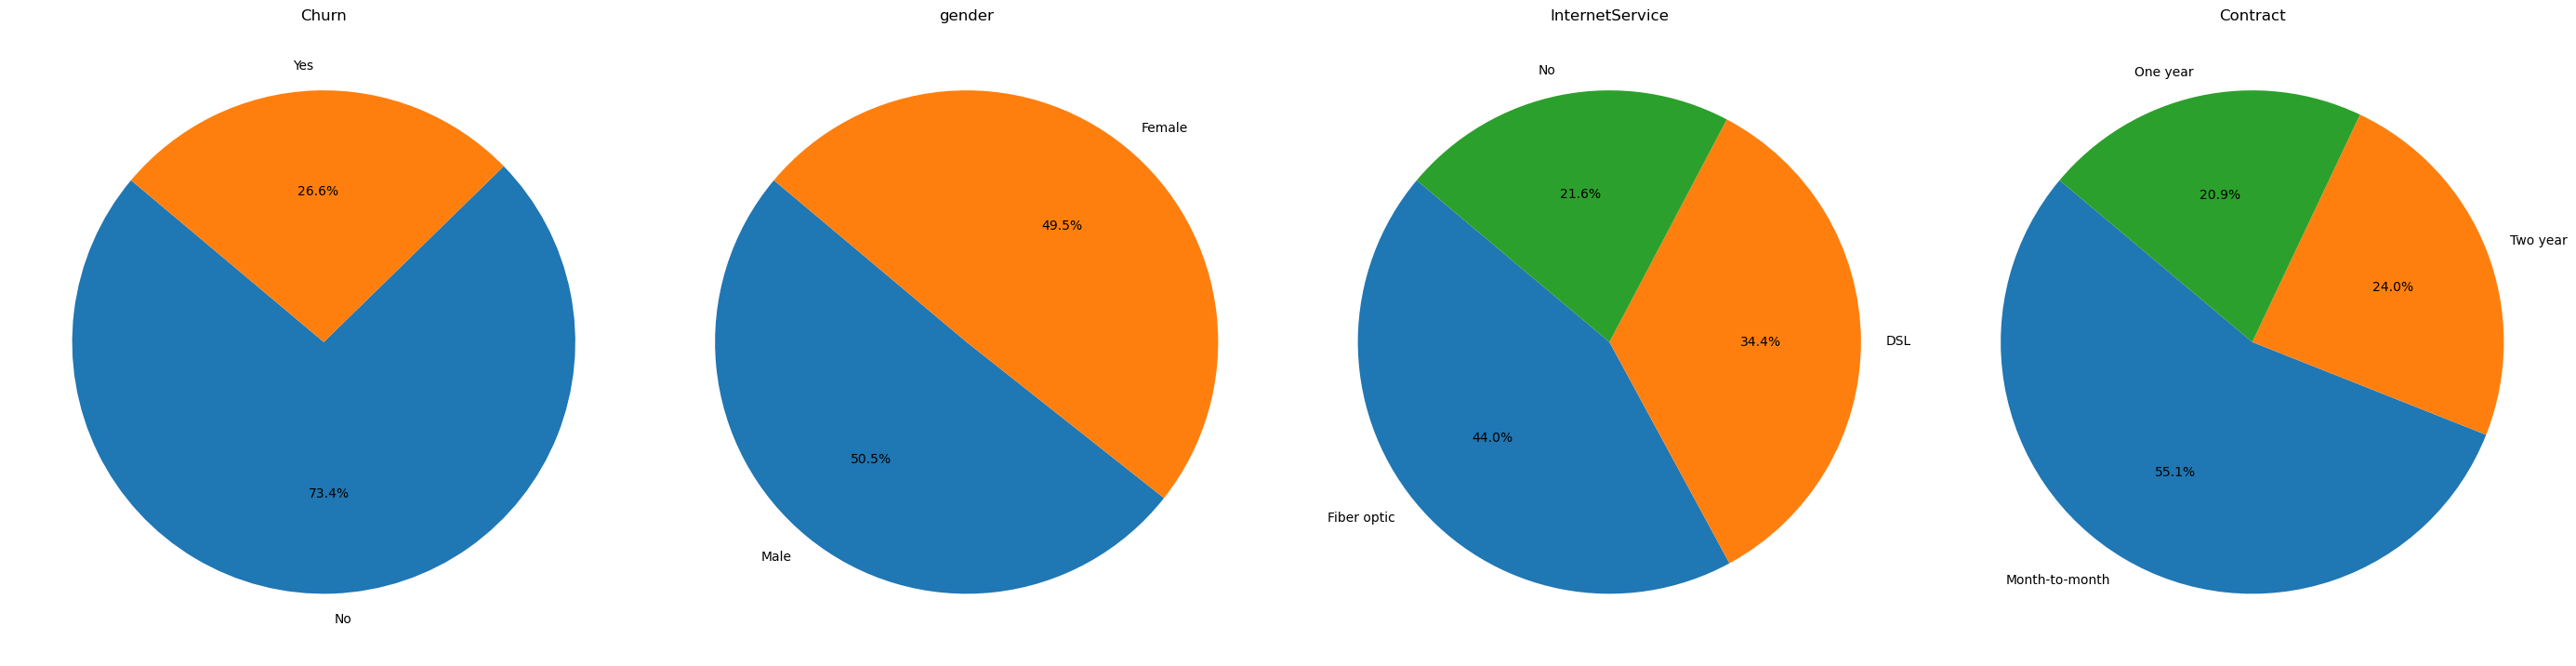

In [6]:
import matplotlib.pyplot as plt

# Sampling categorical columns
categorical_cols = ['Churn', 'gender', 'InternetService','Contract']  

n_cols = len(categorical_cols) # Number of pie charts/subplots

# Creating a figure to contain the pie charts
plt.figure(figsize=(7 * n_cols, 10)) 

for i, col in enumerate(categorical_cols, start=1):
    # Calculating the value counts for each category
    counts = data_cleaned[col].value_counts()
    
    # Creating a subplot for each pie chart
    plt.subplot(1, n_cols, i)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(col)

plt.tight_layout()
plt.show()

#### 1.2.3 Distribution Charts

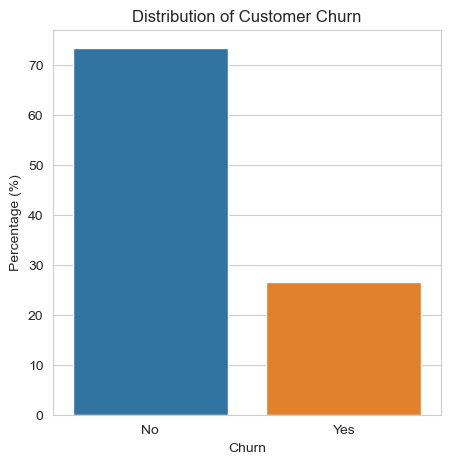

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64


In [7]:
sns.set_style("whitegrid")

# Barchart plot for the distribution of the 'Churn' variable

churn_distribution = data_cleaned['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 5))
sns.barplot(x=churn_distribution.index, y=churn_distribution.values)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Percentage (%)')
plt.show()

print(churn_distribution)

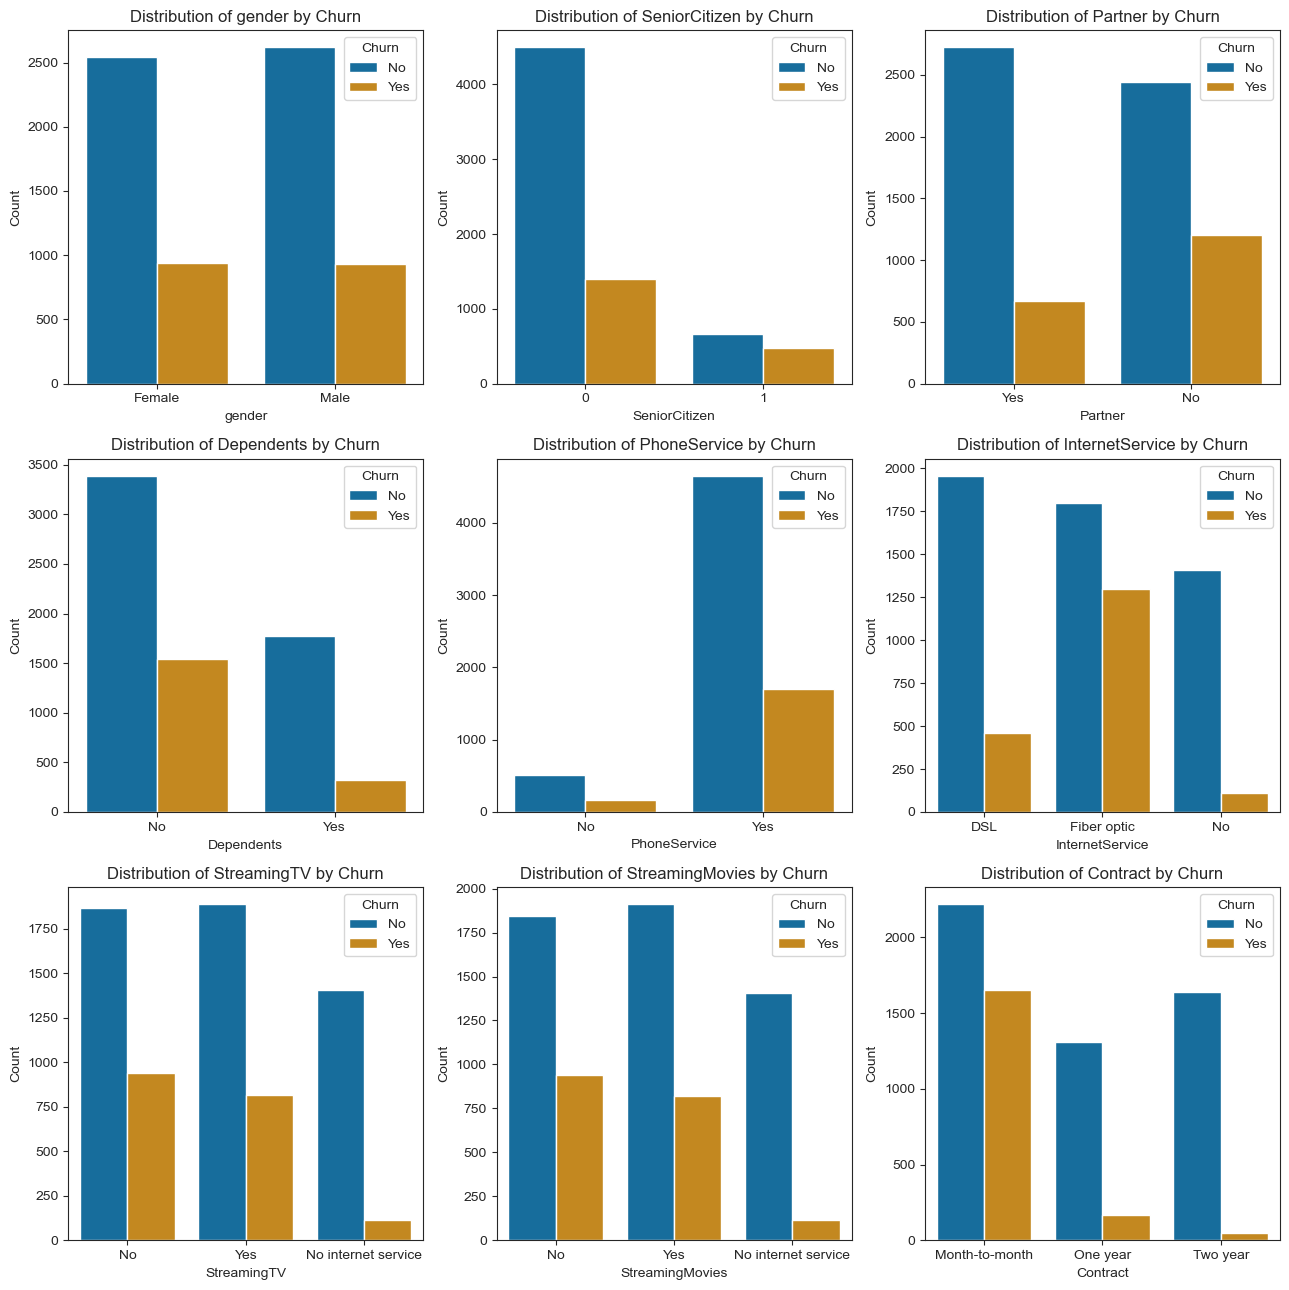

In [8]:
sns.set_style("ticks")

# List of categorical variables 
categorical_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'StreamingTV','StreamingMovies','Contract']

plt.figure(figsize=(13, 13)) # Setting figure size for the plots

# Looping through list of categorical variables to create count plots
for i, var in enumerate(categorical_vars):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=var, hue='Churn', data=data_cleaned, palette='colorblind')
    plt.title(f'Distribution of {var} by Churn')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

### 1.3 Feature Engineering  

#### 1.3.1 Interquartile Range method

In [9]:
# Function defined to remove rows with outliers based on the IQR method for specified columns
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtering the rows that do not contain outliers in the current column
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Continuous numerical columns for outlier analysis
continuous_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Removing rows with outliers in the specified continuous numerical columns
data_without_outliers = remove_outliers_iqr(data_cleaned, continuous_columns)

original_shape = data_cleaned.shape
final_shape = data_without_outliers.shape

original_shape, final_shape # Comparing shapes of the original cleaned data and the data with outliers removed

((7032, 21), (7032, 21))

#### 1.3.2 Boxplots

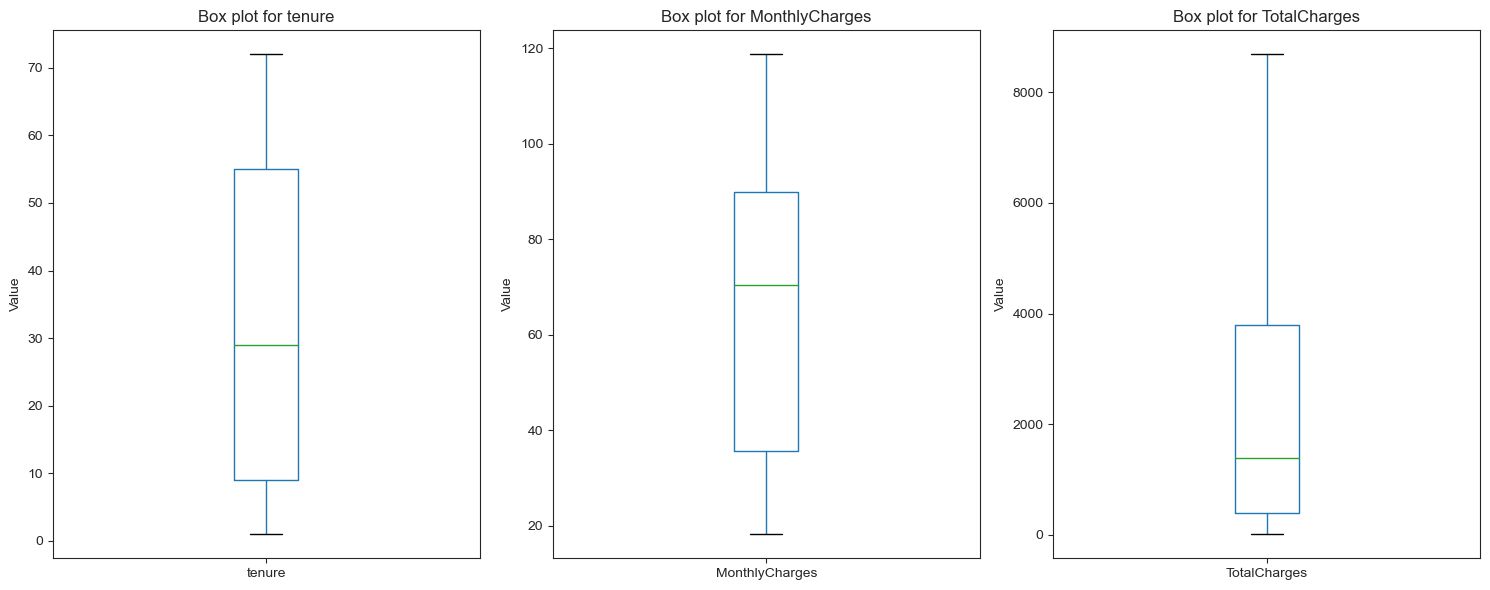

In [10]:
# Selecting numerical columns in the dataset
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('SeniorCitizen')  
num_cols = len(numerical_cols)# Determine the number of columns for subplots

plt.figure(figsize=(5*num_cols, 6))  # Creating a figure to hold subplots

# Creating subplots for each numerical column
for i, col in enumerate(numerical_cols, 1):  # Starting enumeration at 1 for subplot indexing
    plt.subplot(1, num_cols, i)  
    data_cleaned.boxplot(column=[col])
    plt.title(f'Box plot for {col}')
    plt.ylabel('Value')
    plt.grid(False)  

plt.tight_layout()  
plt.show()